#### This jupyter file shows the implementation of tensorflow library to detect 'early blight' and 'late blight' desease found in potatos. It has been trained on 2152 images collected from kaggle [https://www.kaggle.com/datasets/arjuntejaswi/plant-village]

##### import libraries

In [1]:
import numpy as np

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

##### set hyperparameters like epochs

In [55]:
img_size = 256
batch_size = 32
channels = 3
epochs = 50

##### import images in a dataset object using tk.keras.preprocessing

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size = (img_size, img_size),
    batch_size = batch_size
)

Found 2152 files belonging to 3 classes.


In [8]:
class_names = dataset.class_names
class_names

['Potato_Early_blight', 'Potato_Late_blight', 'Potato_healthy']

In [9]:
len(dataset)

68

##### checking first image of first batch

In [12]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[127. 118. 123.]
  [140. 131. 136.]
  [137. 128. 133.]
  ...
  [137. 132. 138.]
  [136. 131. 137.]
  [136. 131. 137.]]

 [[109. 100. 105.]
  [113. 104. 109.]
  [110. 101. 106.]
  ...
  [143. 138. 144.]
  [144. 139. 145.]
  [144. 139. 145.]]

 [[136. 127. 132.]
  [129. 120. 125.]
  [119. 110. 115.]
  ...
  [148. 143. 149.]
  [150. 145. 151.]
  [151. 146. 152.]]

 ...

 [[165. 163. 168.]
  [182. 180. 185.]
  [162. 160. 165.]
  ...
  [187. 184. 191.]
  [185. 182. 189.]
  [182. 179. 186.]]

 [[154. 152. 157.]
  [140. 138. 143.]
  [142. 140. 145.]
  ...
  [182. 179. 186.]
  [184. 181. 188.]
  [185. 182. 189.]]

 [[181. 179. 184.]
  [166. 164. 169.]
  [177. 175. 180.]
  ...
  [178. 175. 182.]
  [184. 181. 188.]
  [190. 187. 194.]]], shape=(256, 256, 3), dtype=float32)


In [13]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy)

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[184., 183., 191.],
        [183., 182., 190.],
        [182., 181., 189.],
        ...,
        [174., 171., 180.],
        [173., 170., 179.],
        [173., 170., 179.]],

       [[187., 186., 194.],
        [185., 184., 192.],
        [184., 183., 191.],
        ...,
        [179., 176., 185.],
        [178., 175., 184.],
        [178., 175., 184.]],

       [[188., 187., 195.],
        [187., 186., 194.],
        [185., 184., 192.],
        ...,
        [181., 178., 187.],
        [180., 177., 186.],
        [179., 176., 185.]],

       ...,

       [[166., 163., 170.],
        [148., 145., 152.],
        [173., 170., 177.],
        ...,
        [152., 151., 159.],
        [148., 147., 155.],
        [148., 147., 155.]],

       [[143., 140., 147.],
        [172., 169., 176.],
        [144., 141., 148.],
        ...,
        [156., 155., 163.],
        [149., 148., 156.],
       

##### checking labels of first batch

In [14]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)
    print(label_batch)

(256, 256, 3)
tf.Tensor([1 1 0 1 0 1 2 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 2 0 1 1 0], shape=(32,), dtype=int32)


##### visualize images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


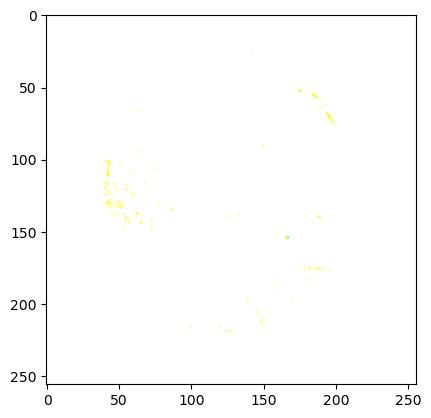

In [16]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0])

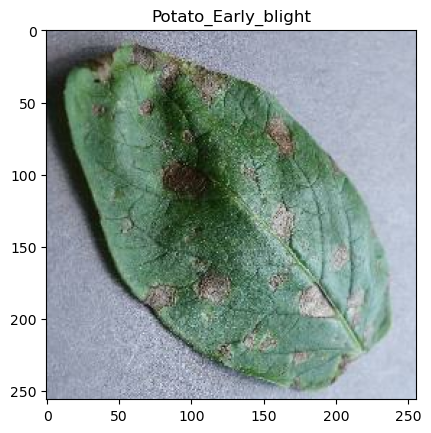

In [21]:
for image_batch, label_batch in dataset.take(1):
    plt.title(class_names[label_batch[0]])
    plt.imshow(image_batch[0].numpy().astype("uint8"))

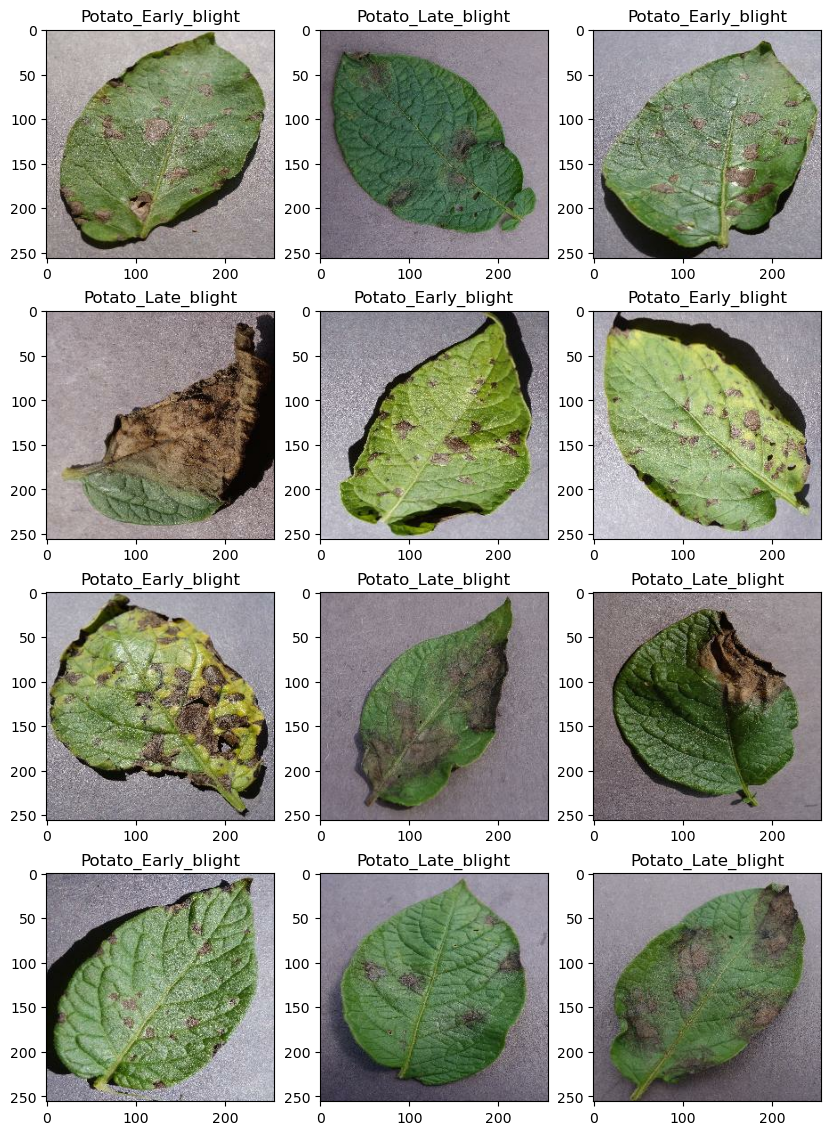

In [24]:
plt.figure(figsize=(10, 14))

for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        
        ax = plt.subplot(4, 3, i+1)
        plt.title(class_names[label_batch[i]])
        plt.imshow(image_batch[i].numpy().astype("uint8"))

##### splitting the dataset

### 80% for training
### 10% for validation and 10% for testing

#### The train, val and test dataset has a batch of 54, 6 and 8 each. Each batch is a group of 32 images.

In [27]:
len(dataset)

68

In [28]:
68*0.8

54.400000000000006

In [29]:
train_size = 0.8
train_ds = dataset.take(54)

len(train_ds)

54

In [31]:
test_size = 0.1

test_ds = dataset.skip(54)
len(test_ds)

14

In [32]:
68*0.1

6.800000000000001

In [33]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [34]:
test_ds =  test_ds.skip(6)
len(test_ds)

8

### method to split dataset

In [35]:
def dataset_partition(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(ds_size * train_split)
    val_size = int(ds_size * val_split)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [36]:
train_ds, val_ds, test_ds = dataset_partition(dataset)

In [37]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

54
6
8


##### caching the images for faster processing

In [40]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

##### preprocessing pipeline

### creating a resize and rescale layer

In [43]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(img_size, img_size),
    layers.experimental.preprocessing.Rescaling(1.0/255),
])

### creating an augmentation layer to flip and rotate images

In [44]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

### building a keras sequential model

In [46]:
input_shape = (batch_size, img_size, img_size, channels)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape = input_shape)

#### checking the model layers

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

### compiling the model with 'adam' optimizer and 'SparseCategoricalCrossentropy' loss

In [48]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

### training the model with 50 iterations and validating with validation data

In [49]:
history = model.fit(
    train_ds,
    epochs = 50,
    batch_size=batch_size,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50


54/54 [==============================] - 38s 582ms/step - loss: 0.8930 - accuracy: 0.5110 - val_loss: 0.8251 - val_accuracy: 0.5208
Epoch 2/50
54/54 [==============================] - 28s 520ms/step - loss: 0.6569 - accuracy: 0.7118 - val_loss: 0.5481 - val_accuracy: 0.7292
Epoch 3/50
54/54 [==============================] - 30s 554ms/step - loss: 0.4498 - accuracy: 0.8113 - val_loss: 0.3443 - val_accuracy: 0.8385
Epoch 4/50
54/54 [==============================] - 28s 520ms/step - loss: 0.2965 - accuracy: 0.8796 - val_loss: 0.2850 - val_accuracy: 0.8802
Epoch 5/50
54/54 [==============================] - 28s 511ms/step - loss: 0.2763 - accuracy: 0.8877 - val_loss: 0.2463 - val_accuracy: 0.9010
Epoch 6/50
54/54 [==============================] - 27s 499ms/step - loss: 0.2620 - accuracy: 0.8947 - val_loss: 0.2236 - val_accuracy: 0.9167
Epoch 7/50
54/54 [==============================] - 26s 490ms/step - loss: 0.2519 - accuracy: 0.9010 - val_loss: 0.2444 - val_accuracy: 0.91

### achieved accuracy of 98.05% at a loss of 5.79%

In [50]:
loss, accuracy = model.evaluate(test_ds)

8/8 [==============================] - 5s 188ms/step - loss: 0.0579 - accuracy: 0.9805


In [51]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [53]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### plotting the accuracy vs loss graph for both training and validation

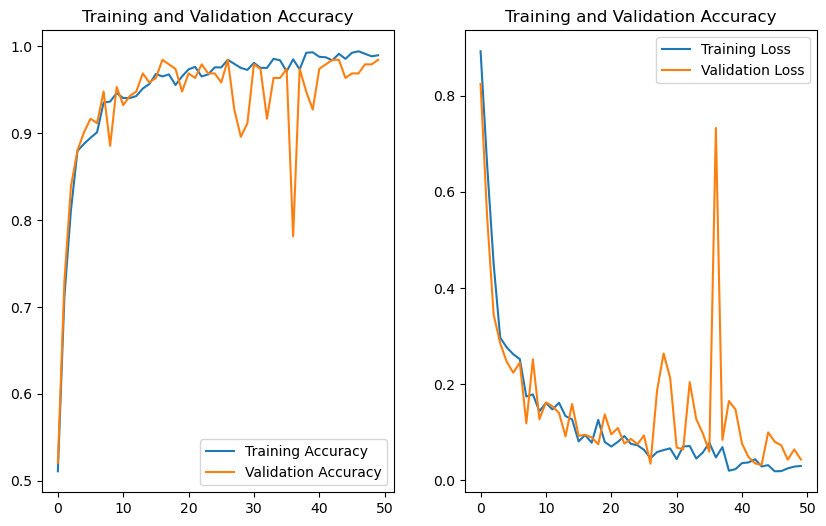

In [58]:
plt.figure(figsize=(10, 6))
# Accuracy graph
plt.subplot(1, 2, 1)

plt.plot(range(epochs), accuracy, label='Training Accuracy')
plt.plot(range(epochs), val_accuracy, label='Validation Accuracy')

plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#loss graph
plt.subplot(1, 2, 2)

plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')

plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

plt.show()

### prediction on one test image

	 first image to predict

Actual Label:  Potato_Early_blight
1/1 [==============================] - 0s 135ms/step

Predicted Label:  Potato_Early_blight


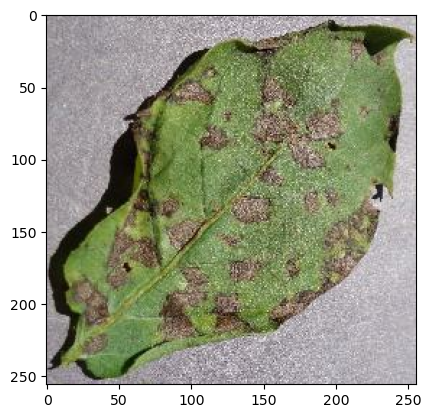

In [63]:
for images_batch, labels_batch in test_ds.take(1):
    
    first_img = images_batch[0].numpy().astype("uint8")
    first_label = labels_batch[0]
    
    print("\t first image to predict")
    plt.imshow(first_img)
    
    print()
    print("Actual Label: ", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print()
    print("Predicted Label: ", class_names[np.argmax(batch_prediction[0])])

### function to preict disease on a potato leaf

In [65]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    
    return predicted_class, confidence

### prediction on 9 test image

1/1 [==============================] - 0s 94ms/step


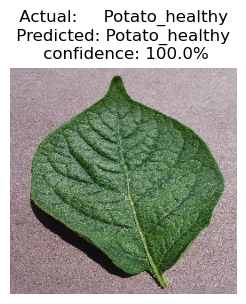

1/1 [==============================] - 0s 101ms/step


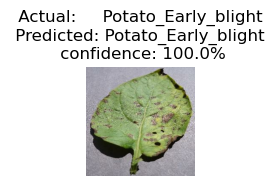

1/1 [==============================] - 0s 95ms/step


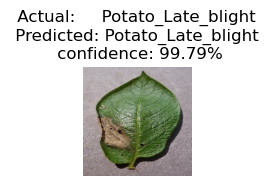

1/1 [==============================] - 0s 94ms/step


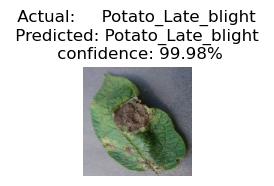

1/1 [==============================] - 0s 94ms/step


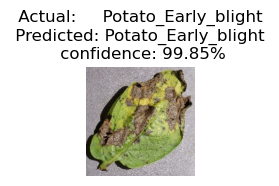

1/1 [==============================] - 0s 94ms/step


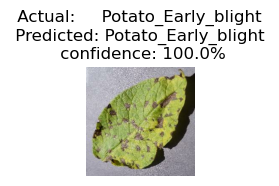

1/1 [==============================] - 0s 91ms/step


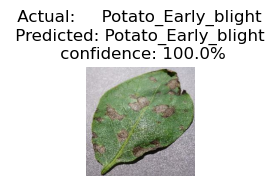

1/1 [==============================] - 0s 94ms/step


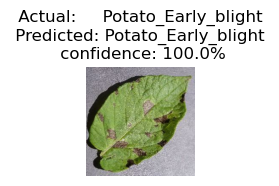

1/1 [==============================] - 0s 110ms/step


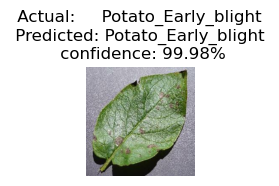

In [71]:
plt.figure(figsize=(16, 10))

for images, labels in test_ds.take(1):
    
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f" Actual:     {actual_class} \n Predicted: {predicted_class} \n confidence: {confidence}%")
        
        plt.axis("off")
        plt.show()

### saving the model

In [73]:
model_version = 2
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/model1\assets


INFO:tensorflow:Assets written to: ../models/model1\assets


### load model

In [5]:
load_model = tf.keras.models.load_model("../models/model1")

In [8]:
load_model